In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import spacy
import nltk
from pyspark.sql import SparkSession
import warnings
warnings.filterwarnings('ignore')

In [2]:
# spark = SparkSession(sc)
spark = SparkSession.builder.appName("Test").getOrCreate()
spark

In [3]:
toronto_review_df = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("C:/Users/91956/Srinivas Shanmuga G/NEU/Q3/ALY6110 DMS & Big Data/Assignments/Group Project/Sentimental Analysis/reviews.csv")

In [4]:
toronto_review_df.show(15)

+--------------------+-------------------+----------+-----------+-------------+--------------------+
|          listing_id|                 id|      date|reviewer_id|reviewer_name|            comments|
+--------------------+-------------------+----------+-----------+-------------+--------------------+
|                1419|           38924112|2015-07-19|   11308465|      Marcela|Having the opport...|
|              <br/>"|               null|      null|       null|         null|                null|
|                1419|           44791978|2015-08-29|    9580285|        Marco|We have no enough...|
|<br/>We loved thi...|               null|      null|       null|         null|                null|
|                1419|           45957133|2015-09-07|   38394721|       Andrea|The listing was e...|
|                1419|           67295154|2016-03-28|    3515044|        Shaun|Alexandra's home ...|
|               <br/>|               null|      null|       null|         null|            

In [5]:
toronto_review_df.describe().show()

+-------+----------------------------+--------------------+--------------------+--------------------+-------------+-----------------+
|summary|                  listing_id|                  id|                date|         reviewer_id|reviewer_name|         comments|
+-------+----------------------------+--------------------+--------------------+--------------------+-------------+-----------------+
|  count|                      433961|              418710|              415622|              414147|       413371|           412973|
|   mean|         6.96129655069552E15|1.207879939113335...|                15.0|1.3465073246580136E8|          NaN|7.888888888888889|
| stddev|        6.295936346664616E16|2.247894959269348...|                null|1.1661419746848173E8|          NaN|15.13425755146208|
|    min|                    10002467|                    |                    |                    |             |                 |
|    max|<br/>ﾎｽﾄの自己紹介に､自分...|” my girlfriend d...|the next do

In [6]:
from pyspark.sql.functions import isnull, when, count, col
toronto_review_df.select([count(when(isnull(c), c)).alias(c) for c in toronto_review_df.columns]).show()

+----------+-----+-----+-----------+-------------+--------+
|listing_id|   id| date|reviewer_id|reviewer_name|comments|
+----------+-----+-----+-----------+-------------+--------+
|         0|15251|18339|      19814|        20590|   20988|
+----------+-----+-----+-----------+-------------+--------+



In [7]:
toronto_review_df = toronto_review_df.drop('id','reviewer_id','reviewer_name')

In [8]:
toronto_review_df = toronto_review_df.na.drop()

In [9]:
toronto_review_df.select([count(when(isnull(c), c)).alias(c) for c in toronto_review_df.columns]).show()

+----------+----+--------+
|listing_id|date|comments|
+----------+----+--------+
|         0|   0|       0|
+----------+----+--------+



In [10]:
reviews_rdd = toronto_review_df.select("comments").rdd.flatMap(lambda x: x)
reviews_rdd.collect()

["Having the opportunity of arriving to Alexandra's house, describes that moments when you feel blessed by God. The house is super beautiful, mega equippied, easy to mantain tidy and clean. And she and her family had been a super host. The neigbourhood is calm and pretty, and near two beautiful streets: Dundas on one side and Queen in the other. We felt very very comfortable and happy at their home. We have no more than THANKS to Alex and her family. Best stay we had ever. ",
 "We have no enough words to describe how beautyful and cozy is Alexandra's house. Every detail is tasteful and functional. our kids have been stunned when they've seen the toys room and tree house.",
 "The listing was exceptional and an even better experience of it in person. The house is beautiful and so accommodating for our group. Anything we could have needed was available and the experience of working with Alexandra was wonderful! The neighborhood is very easy to get around and there's a ton of great restaur

In [11]:
lowerCase_sentRDD = reviews_rdd.map(lambda x : x.lower())
lowerCase_sentRDD.collect()

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def sent_TokenizeFunct(x):
    return nltk.sent_tokenize(x)

sentenceTokenizeRDD = lowerCase_sentRDD.map(sent_TokenizeFunct)


In [39]:
sentenceTokenizeRDD.collect()

[["having the opportunity of arriving to alexandra's house, describes that moments when you feel blessed by god.",
  'the house is super beautiful, mega equippied, easy to mantain tidy and clean.',
  'and she and her family had been a super host.',
  'the neigbourhood is calm and pretty, and near two beautiful streets: dundas on one side and queen in the other.',
  'we felt very very comfortable and happy at their home.',
  'we have no more than thanks to alex and her family.',
  'best stay we had ever.'],
 ["we have no enough words to describe how beautyful and cozy is alexandra's house.",
  'every detail is tasteful and functional.',
  "our kids have been stunned when they've seen the toys room and tree house."],
 ['the listing was exceptional and an even better experience of it in person.',
  'the house is beautiful and so accommodating for our group.',
  'anything we could have needed was available and the experience of working with alexandra was wonderful!',
  "the neighborhood is

In [14]:
def word_TokenizeFunct(x):
    splitted = [word for line in x for word in line.split()]
    return splitted

wordTokenizeRDD = sentenceTokenizeRDD.map(word_TokenizeFunct)

In [45]:
wordTokenizeRDD.collect()

[['having',
  'the',
  'opportunity',
  'of',
  'arriving',
  'to',
  "alexandra's",
  'house,',
  'describes',
  'that',
  'moments',
  'when',
  'you',
  'feel',
  'blessed',
  'by',
  'god.',
  'the',
  'house',
  'is',
  'super',
  'beautiful,',
  'mega',
  'equippied,',
  'easy',
  'to',
  'mantain',
  'tidy',
  'and',
  'clean.',
  'and',
  'she',
  'and',
  'her',
  'family',
  'had',
  'been',
  'a',
  'super',
  'host.',
  'the',
  'neigbourhood',
  'is',
  'calm',
  'and',
  'pretty,',
  'and',
  'near',
  'two',
  'beautiful',
  'streets:',
  'dundas',
  'on',
  'one',
  'side',
  'and',
  'queen',
  'in',
  'the',
  'other.',
  'we',
  'felt',
  'very',
  'very',
  'comfortable',
  'and',
  'happy',
  'at',
  'their',
  'home.',
  'we',
  'have',
  'no',
  'more',
  'than',
  'thanks',
  'to',
  'alex',
  'and',
  'her',
  'family.',
  'best',
  'stay',
  'we',
  'had',
  'ever.'],
 ['we',
  'have',
  'no',
  'enough',
  'words',
  'to',
  'describe',
  'how',
  'beautyful'

In [15]:
def removeStopWordsFunct(x):
    from nltk.corpus import stopwords
    stop_words=set(stopwords.words('english'))
    filteredSentence = [w for w in x if not w in stop_words]
    return filteredSentence

stopwordRDD = wordTokenizeRDD.map(removeStopWordsFunct)


In [50]:
stopwordRDD.collect()

[['opportunity',
  'arriving',
  "alexandra's",
  'house,',
  'describes',
  'moments',
  'feel',
  'blessed',
  'god.',
  'house',
  'super',
  'beautiful,',
  'mega',
  'equippied,',
  'easy',
  'mantain',
  'tidy',
  'clean.',
  'family',
  'super',
  'host.',
  'neigbourhood',
  'calm',
  'pretty,',
  'near',
  'two',
  'beautiful',
  'streets:',
  'dundas',
  'one',
  'side',
  'queen',
  'other.',
  'felt',
  'comfortable',
  'happy',
  'home.',
  'thanks',
  'alex',
  'family.',
  'best',
  'stay',
  'ever.'],
 ['enough',
  'words',
  'describe',
  'beautyful',
  'cozy',
  "alexandra's",
  'house.',
  'every',
  'detail',
  'tasteful',
  'functional.',
  'kids',
  'stunned',
  "they've",
  'seen',
  'toys',
  'room',
  'tree',
  'house.'],
 ['listing',
  'exceptional',
  'even',
  'better',
  'experience',
  'person.',
  'house',
  'beautiful',
  'accommodating',
  'group.',
  'anything',
  'could',
  'needed',
  'available',
  'experience',
  'working',
  'alexandra',
  'wonder

In [16]:
def removePunctuationsFunct(x):
    punc='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    filtered = [''.join(c for c in s if c not in punc) for s in x] 
    #filtered_space = [s for s in filtered if s] #remove empty space 
    return filtered

rmvPunctRDD = stopwordRDD.map(removePunctuationsFunct)

In [63]:
#rmvPunctRDD.collect()

[['opportunity',
  'arriving',
  'alexandras',
  'house',
  'describes',
  'moments',
  'feel',
  'blessed',
  'god',
  'house',
  'super',
  'beautiful',
  'mega',
  'equippied',
  'easy',
  'mantain',
  'tidy',
  'clean',
  'family',
  'super',
  'host',
  'neigbourhood',
  'calm',
  'pretty',
  'near',
  'two',
  'beautiful',
  'streets',
  'dundas',
  'one',
  'side',
  'queen',
  'other',
  'felt',
  'comfortable',
  'happy',
  'home',
  'thanks',
  'alex',
  'family',
  'best',
  'stay',
  'ever'],
 ['enough',
  'words',
  'describe',
  'beautyful',
  'cozy',
  'alexandras',
  'house',
  'every',
  'detail',
  'tasteful',
  'functional',
  'kids',
  'stunned',
  'theyve',
  'seen',
  'toys',
  'room',
  'tree',
  'house'],
 ['listing',
  'exceptional',
  'even',
  'better',
  'experience',
  'person',
  'house',
  'beautiful',
  'accommodating',
  'group',
  'anything',
  'could',
  'needed',
  'available',
  'experience',
  'working',
  'alexandra',
  'wonderful',
  'neighborhoo

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
from nltk.stem import WordNetLemmatizer

def lemmatizationFunct(x):
    lemmatizer = WordNetLemmatizer()
    finalLem = [lemmatizer.lemmatize(s) for s in x]
    return finalLem

lem_wordsRDD = rmvPunctRDD.map(lemmatizationFunct)

In [75]:
#lem_wordsRDD.collect()

[['opportunity',
  'arriving',
  'alexandras',
  'house',
  'describes',
  'moment',
  'feel',
  'blessed',
  'god',
  'house',
  'super',
  'beautiful',
  'mega',
  'equippied',
  'easy',
  'mantain',
  'tidy',
  'clean',
  'family',
  'super',
  'host',
  'neigbourhood',
  'calm',
  'pretty',
  'near',
  'two',
  'beautiful',
  'street',
  'dundas',
  'one',
  'side',
  'queen',
  'other',
  'felt',
  'comfortable',
  'happy',
  'home',
  'thanks',
  'alex',
  'family',
  'best',
  'stay',
  'ever'],
 ['enough',
  'word',
  'describe',
  'beautyful',
  'cozy',
  'alexandras',
  'house',
  'every',
  'detail',
  'tasteful',
  'functional',
  'kid',
  'stunned',
  'theyve',
  'seen',
  'toy',
  'room',
  'tree',
  'house'],
 ['listing',
  'exceptional',
  'even',
  'better',
  'experience',
  'person',
  'house',
  'beautiful',
  'accommodating',
  'group',
  'anything',
  'could',
  'needed',
  'available',
  'experience',
  'working',
  'alexandra',
  'wonderful',
  'neighborhood',
 

In [20]:
def joinTokensFunct(x):
    joinedTokens_list = []
    x = " ".join(x)
    return x

joinedTokens = lem_wordsRDD.map(joinTokensFunct)

In [77]:
#joinedTokens.collect()

['opportunity arriving alexandras house describes moment feel blessed god house super beautiful mega equippied easy mantain tidy clean family super host neigbourhood calm pretty near two beautiful street dundas one side queen other felt comfortable happy home thanks alex family best stay ever',
 'enough word describe beautyful cozy alexandras house every detail tasteful functional kid stunned theyve seen toy room tree house',
 'listing exceptional even better experience person house beautiful accommodating group anything could needed available experience working alexandra wonderful neighborhood easy get around there ton great restaurant coffee shop store within walking distance definitely one nicest house ive ever chance stay in anyone would lucky get experience great home great city',
 'alexandras home amazing neat neighbourhood everything described great condition room great size third floor room sleeping nook outdoor deck fantastic',
 'beautiful home comfortable clean perfect family

In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
def extractPhraseFunct(x):
    from nltk.corpus import stopwords
    stop_words=set(stopwords.words('english'))    
    
    def leaves(tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()
    
    def get_terms(tree):
        for leaf in leaves(tree):
            term = [w for w,t in leaf if not w in stop_words]
            yield term
            
    sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
    grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
    """
    chunker = nltk.RegexpParser(grammar)
    tokens = nltk.regexp_tokenize(x,sentence_re)
    postoks = nltk.tag.pos_tag(tokens) #Part of speech tagging 
    tree = chunker.parse(postoks) #chunking
    terms = get_terms(tree)
    temp_phrases = []
    for term in terms:
        if len(term):
            temp_phrases.append(' '.join(term))
    
    finalPhrase = [w for w in temp_phrases if w] #remove empty lists
    return finalPhrase

extractphraseRDD = joinedTokens.map(extractPhraseFunct)


In [83]:
#extractphraseRDD.collect()

[['opportunity',
  'alexandras house',
  'moment feel',
  'god house',
  'easy mantain tidy clean family',
  'host neigbourhood calm',
  'beautiful street',
  'side',
  'comfortable happy home thanks alex family',
  'stay'],
 ['word describe beautyful cozy alexandras house',
  'detail tasteful functional kid',
  'toy room tree house'],
 ['experience person house',
  'group anything',
  'available experience',
  'wonderful neighborhood easy get',
  'great restaurant coffee shop store',
  'distance',
  'house',
  'chance stay',
  'anyone',
  'experience great home great city'],
 ['alexandras home',
  'neat neighbourhood everything',
  'great condition room great size third floor room',
  'nook outdoor deck'],
 ['beautiful home comfortable clean perfect family family',
  'amazing restaurents',
  'u à complete list sort useful information',
  'route sporti',
  'brbrhighly',
  'recommend housebrbrkate'],
 ['alexandra incredible host stay beautiful home',
  'help',
  'house',
  'great neighb

In [23]:
    nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
def sentimentWordsFunct(x):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer() 
    senti_list_temp = []    
    for i in x:
        y = ''.join(i) 
        vs = analyzer.polarity_scores(y)
        senti_list_temp.append((y, vs))
        senti_list_temp = [w for w in senti_list_temp if w]    
    sentiment_list  = []  
    for j in senti_list_temp:
        first = j[0]
        second = j[1]
    
        for (k,v) in second.items():
            if k == 'compound':
                if v < 0.0:
                    sentiment_list.append((first, "Negative"))
                elif v == 0.0:
                    sentiment_list.append((first, "Neutral"))
                else:
                    sentiment_list.append((first, "Positive"))    
    return sentiment_list
                
sentimentRDD = extractphraseRDD.map(sentimentWordsFunct)

In [33]:
sentimentRDD.collect()[2]

[('experience person house', 'Neutral'),
 ('group anything', 'Neutral'),
 ('available experience', 'Neutral'),
 ('wonderful neighborhood easy get', 'Positive'),
 ('great restaurant coffee shop store', 'Positive'),
 ('distance', 'Neutral'),
 ('house', 'Neutral'),
 ('chance stay', 'Positive'),
 ('anyone', 'Neutral'),
 ('experience great home great city', 'Positive')]

In [ ]:
freqDistRDD = extractphraseRDD.flatMap(lambda x : nltk.FreqDist(x).most_common()).map(lambda x: x).reduceByKey(lambda x,y : x+y).sortBy(lambda x: x[1], ascending = False)

<AxesSubplot:ylabel='Keywords'>

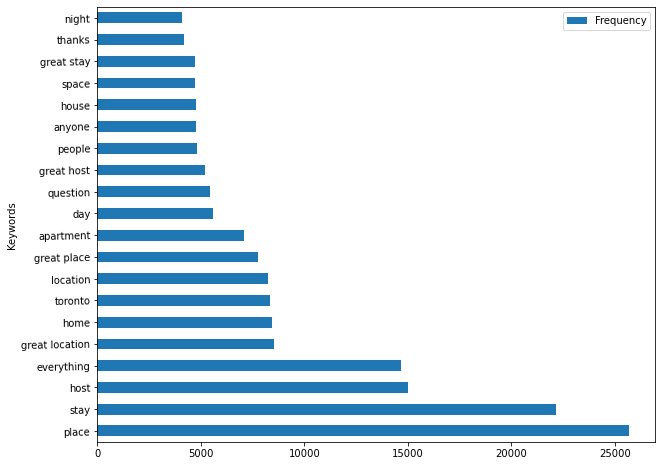

In [26]:
df_fDist = freqDistRDD.toDF() #converting RDD to spark dataframe
df_fDist.createOrReplaceTempView("myTable") 
df2 = spark.sql("SELECT _1 AS Keywords, _2 as Frequency from myTable limit 20") #renaming columns 
pandD = df2.toPandas() #converting spark dataframes to pandas dataframes
pandD.plot.barh(x='Keywords', y='Frequency', rot=1, figsize=(10,8))

In [30]:
pip install wordcloud

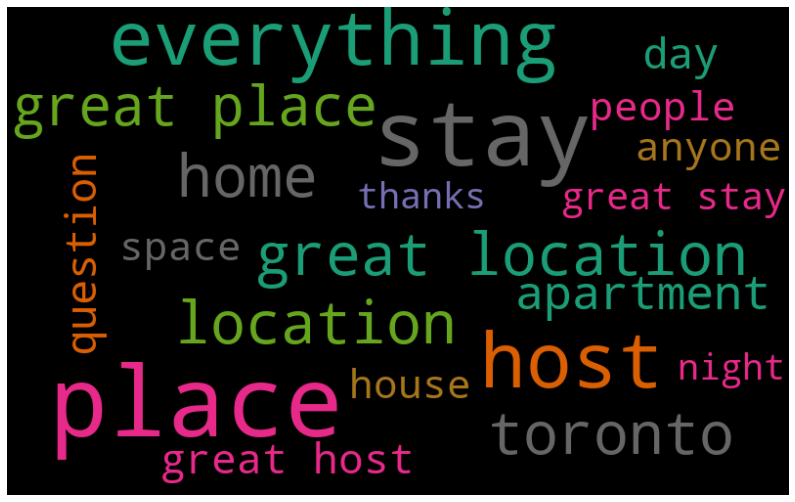

In [31]:
from wordcloud import WordCloud
wordcloudConvertDF = pandD.set_index('Keywords').T.to_dict('records')
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate_from_frequencies(dict(*wordcloudConvertDF))
plt.figure(figsize=(14, 10))    
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
toronto_review_df = pd.read_csv("reviews.csv") 

In [4]:
toronto_review_df.shape

(412414, 6)

In [13]:
toronto_review_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         55
dtype: int64

In [14]:
toronto_review_df['comments'] = toronto_review_df['comments'].fillna("missing review")

In [15]:
toronto_review_df.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [16]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [17]:
# Let's take a look at the updated text
toronto_review_df['cleaned_comments'] = pd.DataFrame(toronto_review_df.comments.apply(cleaned1))
toronto_review_df.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...,having the opportunity of arriving to alexandr...
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...,we have no enough words to describe how beauty...
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...,the listing was exceptional and an even better...
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...,alexandras home was amazing and in such a neat...
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...,beautiful home very comfortable and clean perf...
5,1419,179394665,2017-08-07,111148735,Melissa,Alexandra was such an incredible host during o...,alexandra was such an incredible host during o...
6,1419,216619832,2017-12-04,46323833,Rachel,The host canceled this reservation 22 days bef...,the host canceled this reservation days befor...
7,8077,7830,2009-08-20,12750,Margarita,We had a lovely time in Toronto! Kathie and La...,we had a lovely time in toronto kathie and lar...
8,573892,2163249,2012-09-01,3226641,Meera,My boyfriend & I had a wonderful 4 day/3 night...,my boyfriend i had a wonderful night stay i...
9,573892,2312169,2012-09-17,2300346,Andrea,"Frank was a great host. arriving very late, F...",frank was a great host arriving very late fra...


In [18]:
complete_reviews_df = toronto_review_df.sample(frac= 0.5)

In [19]:
complete_reviews_df.shape

(206207, 7)

In [20]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in complete_reviews_df['cleaned_comments'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

nice house and excellent location had a chance to meet and befriend lot of people great host
compound: 0.9118, neg: 0.0, neu: 0.488, pos: 0.512, 
the place was amazing it was really clean and cozy the location was close to everything looking to be booking this place again
compound: 0.7778, neg: 0.0, neu: 0.756, pos: 0.244, 
good but to far
compound: 0.2382, neg: 0.0, neu: 0.606, pos: 0.394, 
very clean and modern liked the location as well i would love to stay here again nis is an amazing host 
compound: 0.9422, neg: 0.0, neu: 0.486, pos: 0.514, 
overall experience was great everything was what we wanted and needed the only issue we had was the elevators in the building take forever to get to the floor when we checked out we waited about  minutes to half an hour to get on one elevator other than that we would come back again and this place has a great view of the cn tower if that is something you are looking for
compound: 0.8481, neg: 0.0, neu: 0.895, pos: 0.105, 


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

all_words_review = convert(complete_reviews_df['cleaned_comments'].fillna("")) #Fill in missing reviews with blank

In [52]:
import collections


count_word = collections.Counter(all_words_review) #Count word frequency

clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()

,words,count
0,and,369513
1,the,338747
2,a,217657
3,to,216436
4,was,190673


In [54]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words(['english']))
list(stop_words)[0:12]

['in',
 'was',
 'as',
 'does',
 'couldn',
 'don',
 'needn',
 'yourself',
 "wouldn't",
 'am',
 'against',
 'when']

In [55]:
words_review_cleaned = [word for word in all_words_review if word not in stop_words]
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

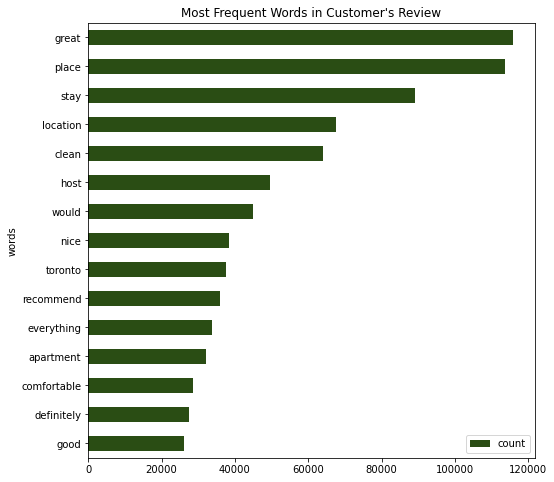

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="#2A4D14")

ax.set_title("Most Frequent Words in Customer's Review")

plt.show()

In [40]:

from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [42]:
toronto_reviews_eng = [r for r in complete_reviews_df['cleaned_comments'] if get_language(r) == 'english']

KeyboardInterrupt: 

In [28]:
polarity_scores = [sid.polarity_scores(comment) for comment in complete_reviews_df['cleaned_comments']]

<AxesSubplot:ylabel='Frequency'>

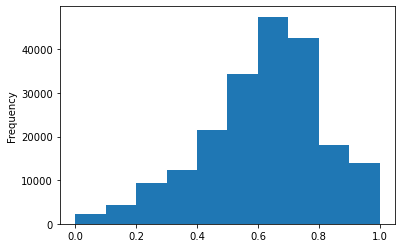

In [37]:
pd.Series([score['neu'] for score in polarity_scores]).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

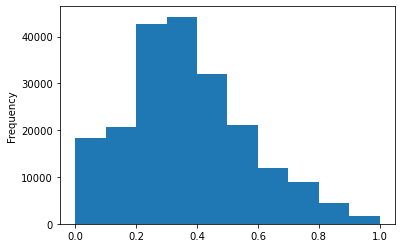

In [38]:
pd.Series([score['pos'] for score in polarity_scores]).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

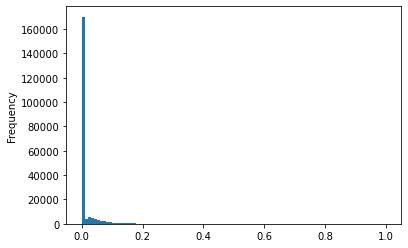

In [39]:
pd.Series([score['neg'] for score in polarity_scores]).plot(kind='hist', bins=100)

In [43]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = complete_reviews_df['cleaned_comments']
scored_reviews['compound'] = [score['compound'] for score in polarity_scores]
scored_reviews['negativity'] = [score['neg'] for score in polarity_scores]
scored_reviews['neutrality'] = [score['neu'] for score in polarity_scores]
scored_reviews['positivity'] = [score['pos'] for score in polarity_scores]

In [58]:
scored_reviews.head(10)

,review,compound,negativity,neutrality,positivity
148991,nice house and excellent location had a chance...,0.9118,0.000,0.488,0.512
58537,the place was amazing it was really clean and ...,0.7778,0.000,0.756,0.244
118395,good but to far,0.2382,0.000,0.606,0.394
157455,very clean and modern liked the location as we...,0.9422,0.000,0.486,0.514
327313,overall experience was great everything was wh...,0.8481,0.000,0.895,0.105
310008,wonderful location sunny is extremely responsi...,0.9626,0.070,0.620,0.310
81669,tara was a great host she remotely opened the ...,0.9476,0.000,0.735,0.265
373071,location location location if you want to be i...,0.8964,0.049,0.789,0.163
265631,prime location easy check in with a great spac...,0.9230,0.048,0.581,0.370
30840,great location a short walk from great restau...,0.9001,0.000,0.389,0.611


In [61]:
scored_reviews.shape

(206207, 5)

In [65]:
scored_reviews.query('negativity > 0')

,review,compound,negativity,neutrality,positivity
310008,wonderful location sunny is extremely responsi...,0.9626,0.070,0.620,0.310
373071,location location location if you want to be i...,0.8964,0.049,0.789,0.163
265631,prime location easy check in with a great spac...,0.9230,0.048,0.581,0.370
287111,not very good value the pictures show the apar...,-0.2417,0.214,0.659,0.127
168574,youre crazy if you pass on this place gorgeous...,0.7906,0.073,0.640,0.287
...,...,...,...,...,...
97299,peter wasnt there when we arrived it was his b...,0.9493,0.028,0.731,0.241
348533,perfect everything is there and jessica is a...,-0.0772,0.299,0.479,0.222
229890,the best airbnb host ever ms hajnal is a kind ...,0.9806,0.035,0.684,0.282
311166,easy to find parking was fine and on the road ...,0.6942,0.076,0.656,0.268


In [49]:
scored_reviews.query('negativity > positivity').query('compound > 0.2')

,review,compound,negativity,neutrality,positivity
114424,i have no complaint while i stayed there the h...,0.2023,0.204,0.602,0.194
301067,the location of the house is greatbrbunch of r...,0.2122,0.072,0.865,0.063
86181,i have never been a fan of airbnbs in fact thi...,0.3434,0.091,0.830,0.079
197072,magnifique séjour très près de plusieurs attra...,0.2023,0.056,0.892,0.052
208294,this unit is at a great location ac was really...,0.2429,0.088,0.825,0.087
282554,we did not enjoy our time spent here we barely...,0.2815,0.067,0.877,0.056
252868,tenants are in the basement and they smoke mar...,0.2263,0.035,0.932,0.033
93936,lynns place was quaint and is as represented i...,0.2370,0.084,0.839,0.077
301505,great location super stylish airbnb ive never ...,0.3500,0.096,0.811,0.093
378148,unfortunately i cannot recommend this place t...,0.3054,0.073,0.857,0.070


In [68]:
scored_reviews.query('neutrality > 0')

,review,compound,negativity,neutrality,positivity
148991,nice house and excellent location had a chance...,0.9118,0.00,0.488,0.512
58537,the place was amazing it was really clean and ...,0.7778,0.00,0.756,0.244
118395,good but to far,0.2382,0.00,0.606,0.394
157455,very clean and modern liked the location as we...,0.9422,0.00,0.486,0.514
327313,overall experience was great everything was wh...,0.8481,0.00,0.895,0.105
...,...,...,...,...,...
175464,aidas place was great the location is amazing ...,0.9201,0.00,0.550,0.450
275360,this place is exactly how it looks very clean ...,0.8687,0.00,0.634,0.366
409083,great comfy place in a quiet neighborhood and ...,0.9022,0.00,0.474,0.526
16737,great location little noisy because of gardin...,0.9161,0.05,0.454,0.497


In [66]:
scored_reviews.query('positivity > 0')

,review,compound,negativity,neutrality,positivity
148991,nice house and excellent location had a chance...,0.9118,0.00,0.488,0.512
58537,the place was amazing it was really clean and ...,0.7778,0.00,0.756,0.244
118395,good but to far,0.2382,0.00,0.606,0.394
157455,very clean and modern liked the location as we...,0.9422,0.00,0.486,0.514
327313,overall experience was great everything was wh...,0.8481,0.00,0.895,0.105
...,...,...,...,...,...
175464,aidas place was great the location is amazing ...,0.9201,0.00,0.550,0.450
275360,this place is exactly how it looks very clean ...,0.8687,0.00,0.634,0.366
409083,great comfy place in a quiet neighborhood and ...,0.9022,0.00,0.474,0.526
16737,great location little noisy because of gardin...,0.9161,0.05,0.454,0.497


In [67]:
scored_reviews.query('negativity > positivity')

,review,compound,negativity,neutrality,positivity
287111,not very good value the pictures show the apar...,-0.2417,0.214,0.659,0.127
33619,the location was good to get satation within ...,-0.6179,0.146,0.799,0.055
36187,lage absolut top ich gab sterne bei sauberkei...,-0.9738,0.187,0.799,0.014
130132,great location comfy but not the kind of apart...,-0.6225,0.154,0.787,0.059
204220,rachel was amazing i didnt meet antonio but i ...,-0.3812,0.196,0.686,0.118
...,...,...,...,...,...
115570,very food kitchen space not ideal head room fo...,-0.4168,0.176,0.824,0.000
270253,ive been using airbnb for years now and this w...,-0.9456,0.124,0.848,0.028
326137,horrible i dont recommend looks nothing like t...,-0.9443,0.273,0.706,0.020
205327,foi minha primeira experiência no site e tudo ...,-0.2960,0.068,0.932,0.000
